# COVID-19 Stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Online Gaming
title = "COVID-19"
symbols = ['PRGO', 'AMED', 'EHC', 'LHCG', 'CNC', 'TDOC', 'DXCM', 'HOLX', 'BIO', 'DHR', 'TMO', 'ANTM', 'BMY', 'GH', 'IOVA', 'IQV', 'MDT', 'VEEV', 'WST', 'FSPHX', 'BHCFX', 'PRHSX','IHI', 'RYH', 'XLV', 'XHE']
start = '2018-01-01'
end = '2020-06-26'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

905

In [7]:
df.head()

PRGO       AMED        EHC       LHCG        CNC       TDOC  \
Date                                                                           
2018-01-02  86.560356  53.790001  49.234493  61.619999  51.294998  36.200001   
2018-01-03  86.319077  52.689999  48.745792  61.919998  52.215000  36.849998   
2018-01-04  87.901848  53.049999  50.259811  64.510002  51.250000  37.200001   
2018-01-05  87.998344  52.889999  50.278976  64.339996  52.744999  37.500000   
2018-01-08  86.984993  50.509998  47.969620  61.259998  52.459999  36.049999   

                 DXCM       HOLX         BIO        DHR  ...        MDT  \
Date                                                     ...              
2018-01-02  57.990002  42.869999  241.419998  91.191078  ...  77.746536   
2018-01-03  58.080002  43.490002  250.470001  92.404449  ...  79.363701   
2018-01-04  52.250000  43.770000  248.490005  92.848373  ...  79.552849   
2018-01-05  53.259998  43.980000  249.050003  93.430397  ...  80.895760   
2018-01-08  55.439999  44.419998  251.000000  93.963112  ...  80.867371   

                 VEEV         WST      FSPHX  BHCFX      PRHSX         IHI  \
Date                                                                         
2018-01-02  55.070000   98.237854  19.940559    NaN  63.421398  175.057892   
2018-01-03  56.279999   98.356316  20.119801    NaN  64.103729  176.905106   
2018-01-04  56.900002   98.326698  20.077627    NaN  63.837891  176.905106   
2018-01-05  57.439999   99.560852  20.205027    NaN  64.289825  178.921112   
2018-01-08  57.709999  100.123627  20.168125    NaN  63.802444  179.944061   

                   RYH        XLV        XHE  
Date                                          
2018-01-02  179.344879  79.736702  65.242516  
2018-01-03  180.951279  80.499641  65.332390  
2018-01-04  181.246933  80.614067  65.212547  
2018-01-05  182.804062  81.300713  65.901535  
2018-01-08  182.784348  81.005074  66.300941  

[5 rows x 26 columns]

In [8]:
df.tail()

PRGO        AMED        EHC        LHCG        CNC  \
Date                                                                  
2020-06-19  54.869999  198.580002  63.943573  168.830002  64.220001   
2020-06-22  55.180000  197.600006  63.445885  168.520004  63.099998   
2020-06-23  55.070000  198.309998  62.878510  168.940002  63.770000   
2020-06-24  53.950001  192.000000  60.609032  166.759995  61.880001   
2020-06-25  54.730000  198.649994  60.250690  172.100006  63.360001   

                  TDOC        DXCM       HOLX         BIO         DHR  ...  \
Date                                                                   ...   
2020-06-19  201.529999  409.359985  55.160000  451.959991  172.768433  ...   
2020-06-22  204.940002  406.329987  55.209999  456.489990  174.656448  ...   
2020-06-23  198.080002  406.899994  55.500000  451.779999  175.405655  ...   
2020-06-24  197.009995  394.299988  53.669998  432.420013  171.279999  ...   
2020-06-25  201.699997  398.089996  54.570000  437.239990  172.149994  ...   

                  MDT        VEEV         WST      FSPHX  BHCFX      PRHSX  \
Date                                                                         
2020-06-19  93.297523  226.669998  216.589996  30.320000  14.49  87.500000   
2020-06-22  92.721306  238.919998  217.800003  30.450001  14.60  87.809998   
2020-06-23  92.780907  239.100006  217.539993  30.580000  14.73  88.419998   
2020-06-24  88.349998  234.309998  216.509995  29.730000  14.31  86.000000   
2020-06-25  88.860001  236.820007  223.360001  30.150000  14.53  87.050003   

                   IHI         RYH         XLV        XHE  
Date                                                       
2020-06-19  264.149994  222.500992  100.325005  87.790001  
2020-06-22  263.920013  221.979996   99.940002  88.029999  
2020-06-23  265.769989  222.949997  100.370003  88.989998  
2020-06-24  255.690002  215.949997   97.750000  85.790001  
2020-06-25  257.720001  217.919998   98.709999  86.820000  

[5 rows x 26 columns]

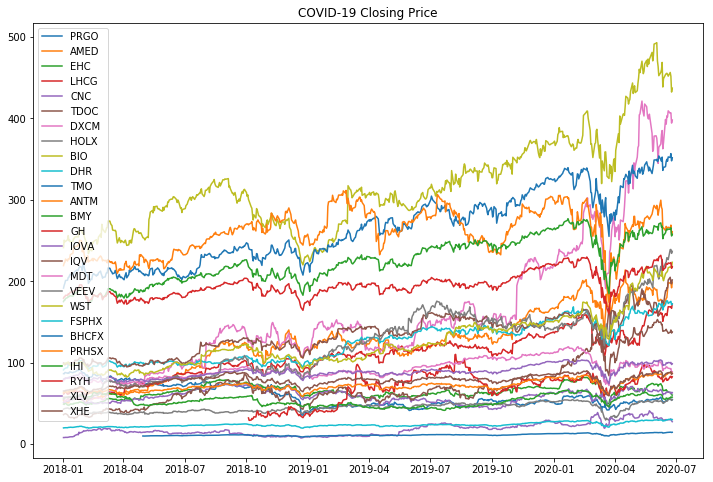

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

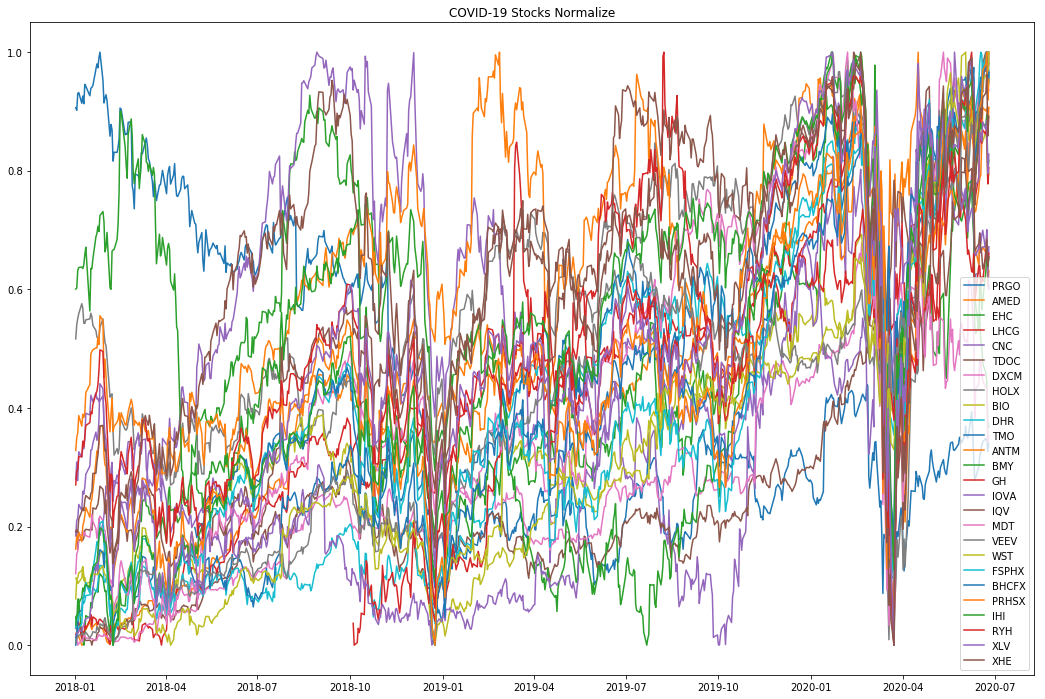

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

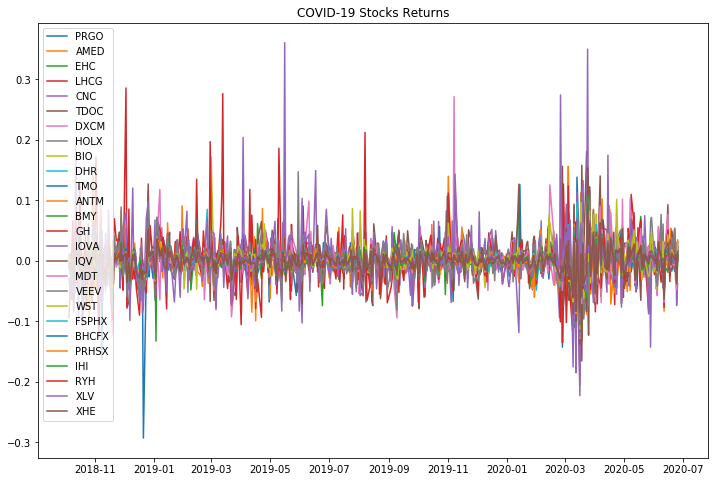

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

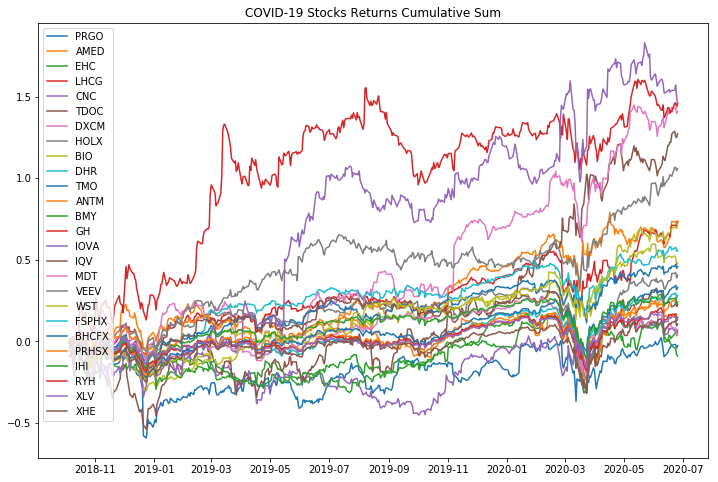

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

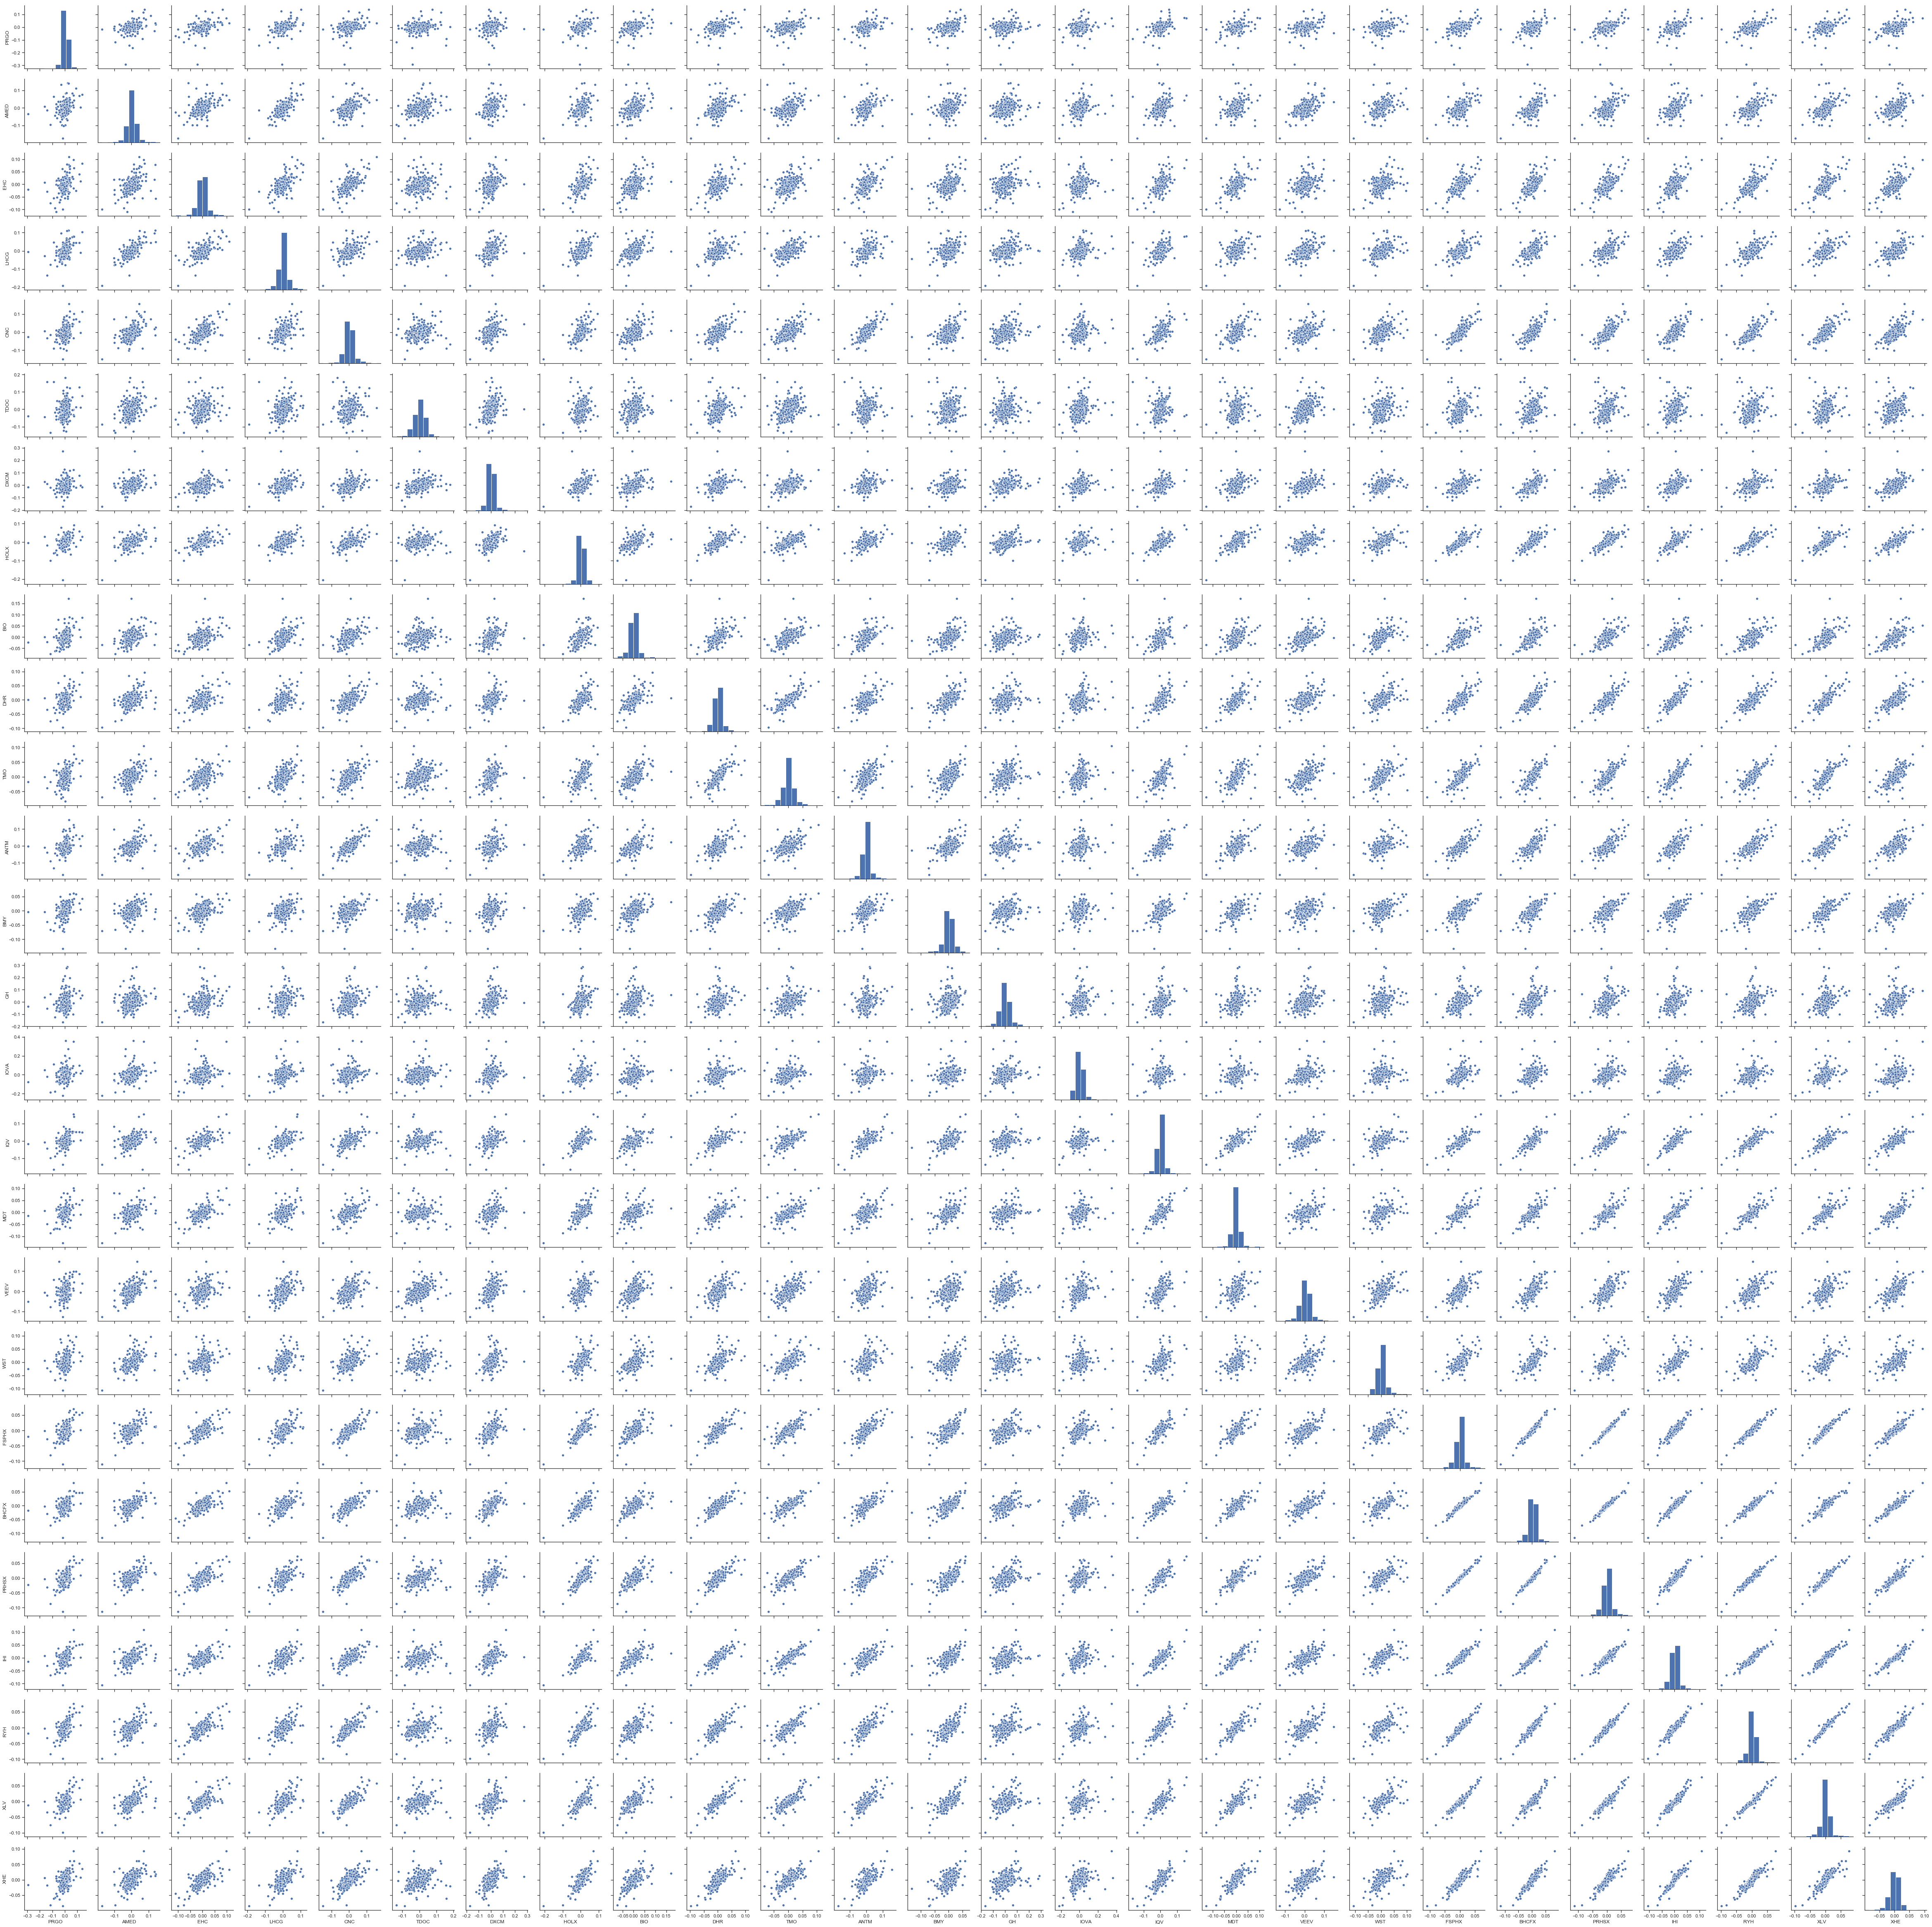

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

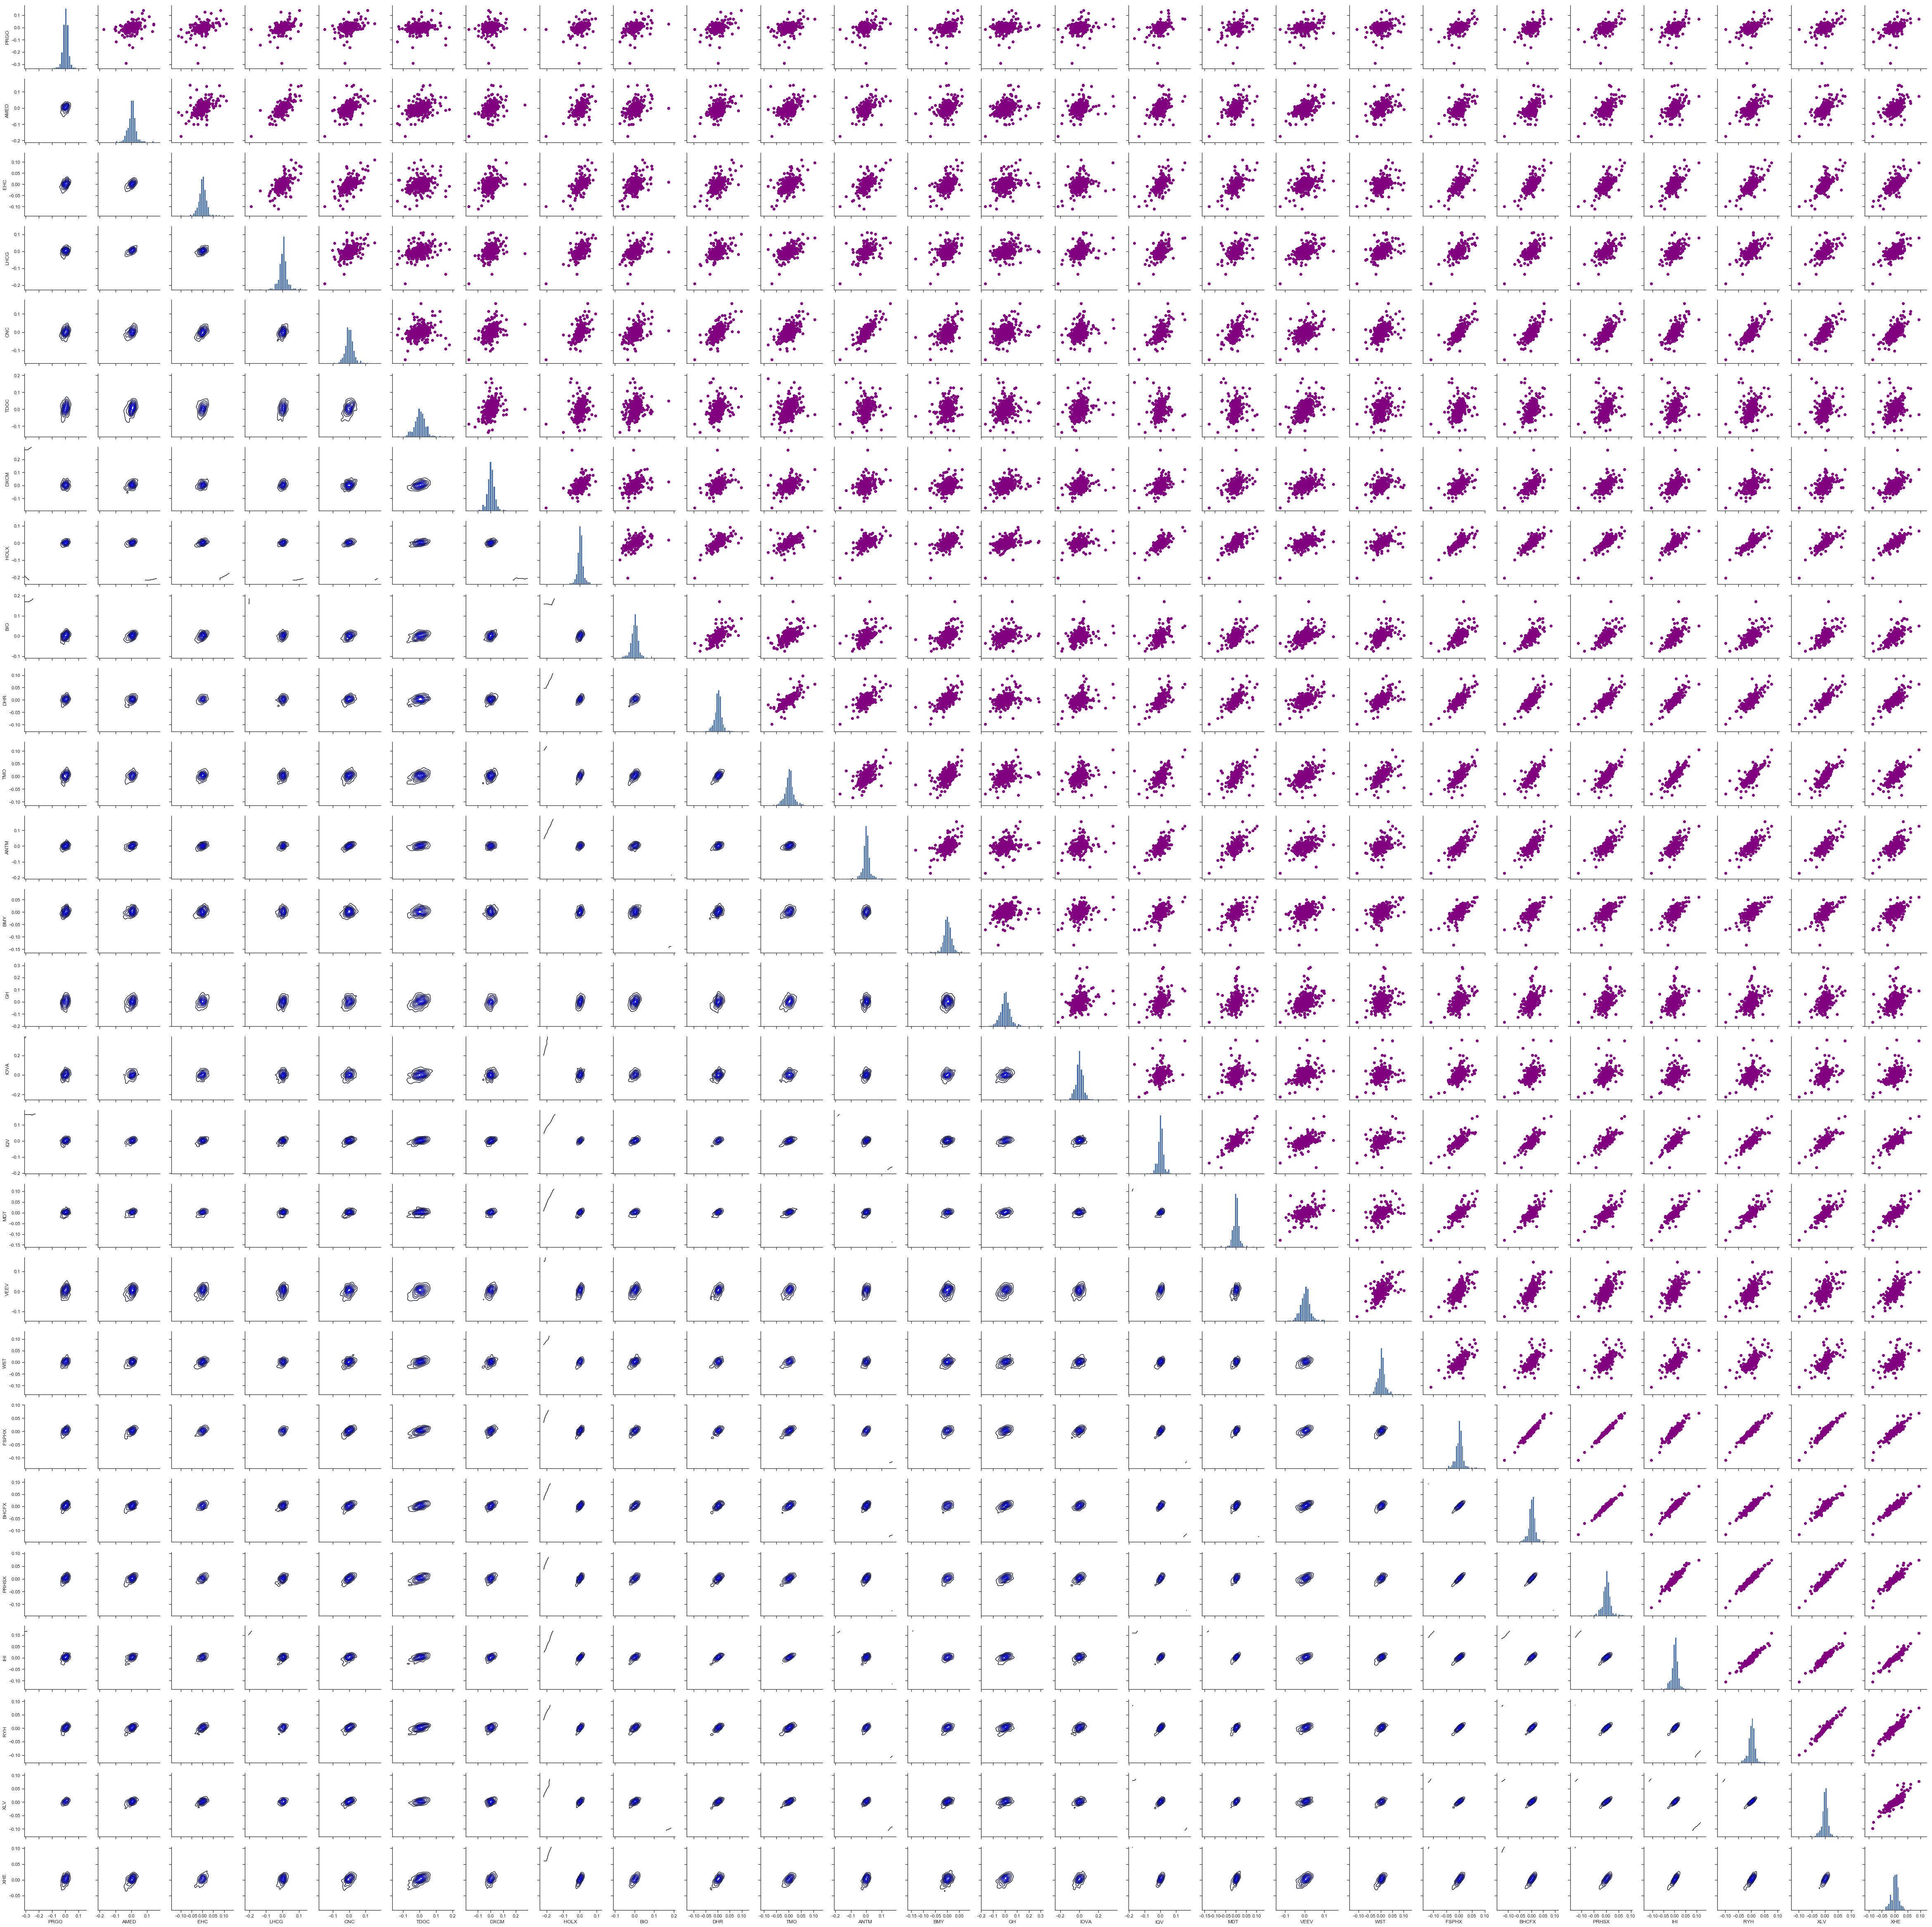

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

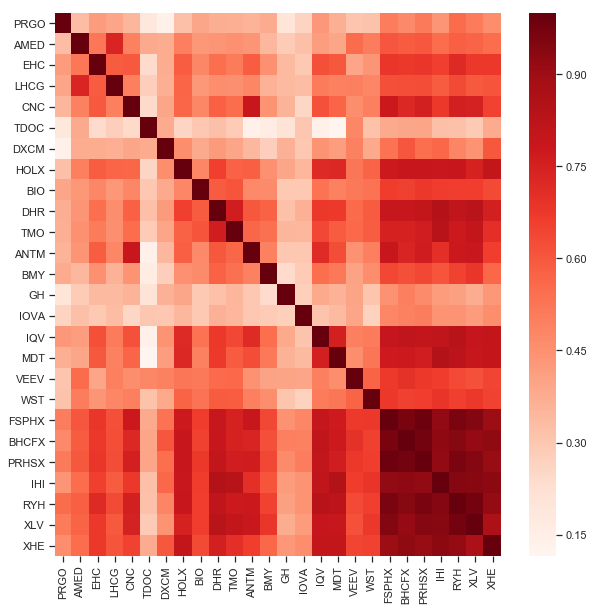

In [17]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

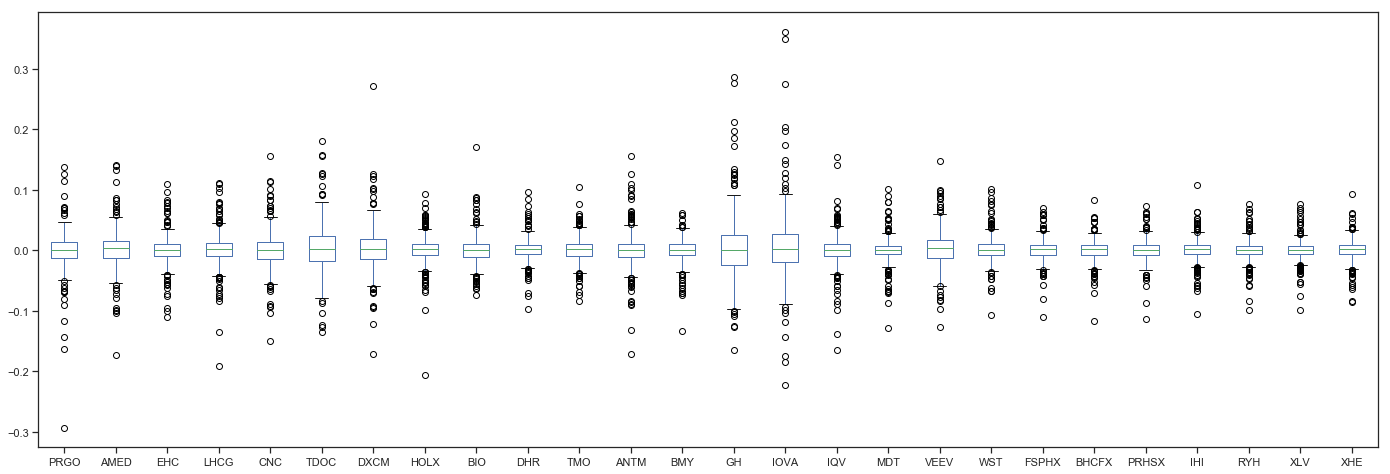

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

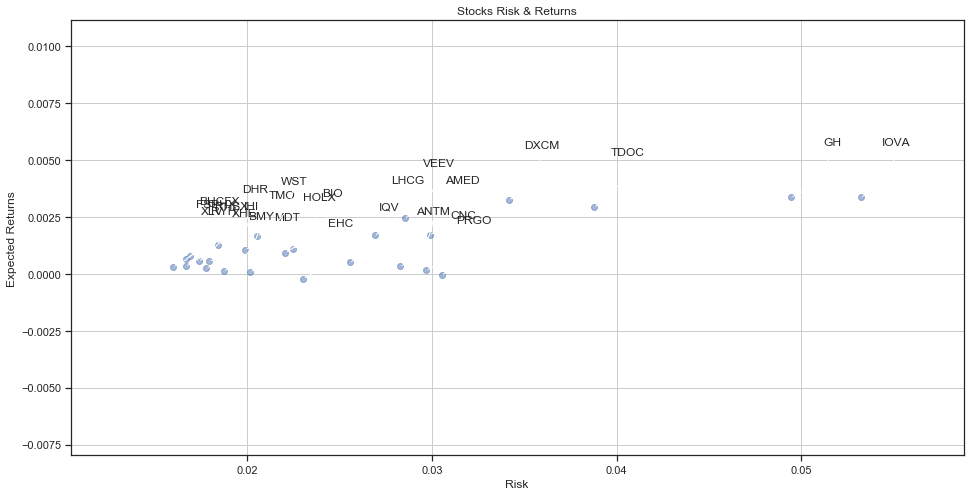

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

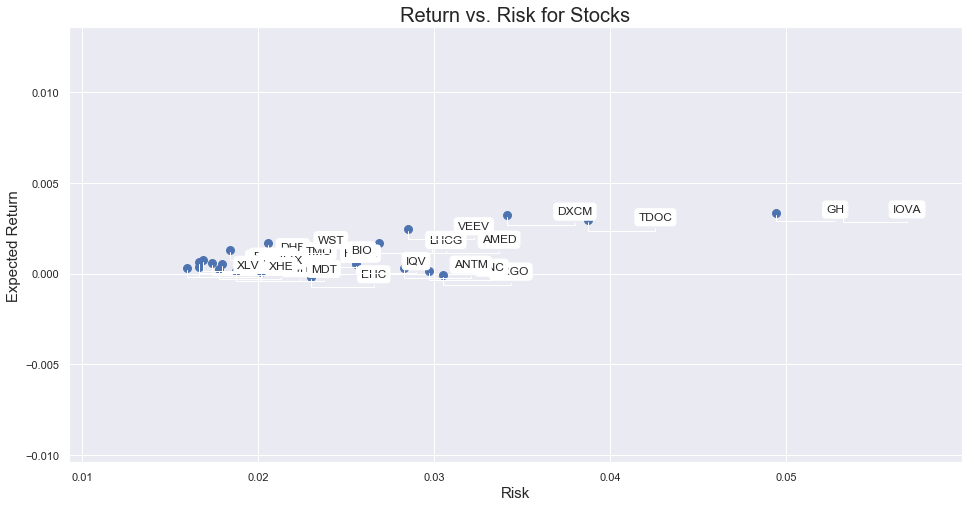

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
def annual_risk_return(stock_rets):
    tradeoff = stock_rets.agg(["mean", "std"]).T
    tradeoff.columns = ["Return", "Risk"]
    tradeoff.Return = tradeoff.Return*252
    tradeoff.Risk = tradeoff.Risk * np.sqrt(252)
    return tradeoff

In [22]:
tradeoff = annual_risk_return(stock_rets)
tradeoff

Return      Risk
PRGO  -0.015248  0.484617
AMED   0.429228  0.474288
EHC   -0.051871  0.365559
LHCG   0.425654  0.426948
CNC    0.040352  0.471479
TDOC   0.740640  0.615577
DXCM   0.818884  0.542420
HOLX   0.236323  0.350276
BIO    0.280522  0.356767
DHR    0.324552  0.292127
TMO    0.266928  0.315727
ANTM   0.082531  0.449037
BMY    0.033065  0.297355
GH     0.847142  0.784935
IOVA   0.848977  0.844912
IQV    0.130354  0.405695
MDT    0.023347  0.320116
VEEV   0.615006  0.452665
WST    0.421413  0.326266
FSPHX  0.164696  0.264559
BHCFX  0.192423  0.268106
PRHSX  0.140757  0.275709
IHI    0.138372  0.284967
RYH    0.085491  0.264726
XLV    0.079399  0.253971
XHE    0.062220  0.282395

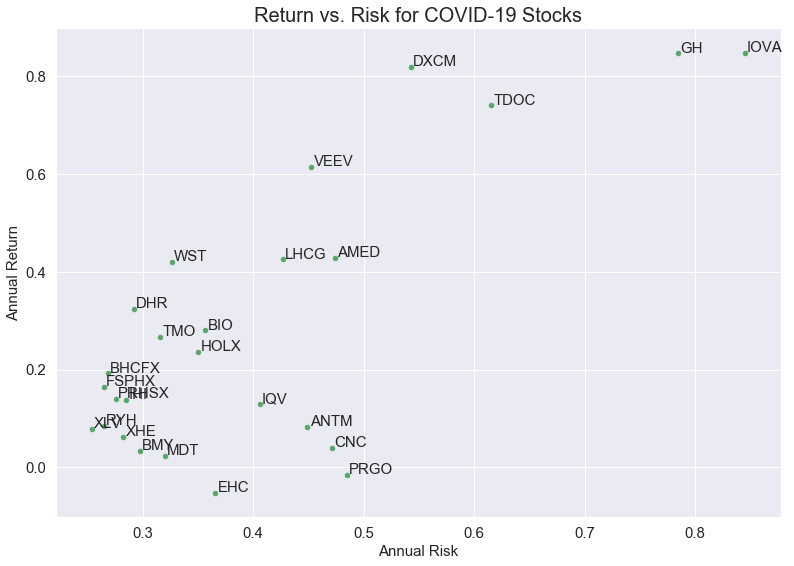

In [23]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

tradeoff.plot(x = "Risk", y = "Return", kind = "scatter", figsize = (13,9), s = 20, fontsize = 15, c='g')
for i in tradeoff.index:
    plt.annotate(i, xy=(tradeoff.loc[i, "Risk"]+0.002, tradeoff.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Return vs. Risk for " + title + " Stocks", fontsize = 20)
plt.show()

In [24]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

XHE    XHE      1.000000
BMY    BMY      1.000000
IHI    IHI      1.000000
PRHSX  PRHSX    1.000000
BHCFX  BHCFX    1.000000
FSPHX  FSPHX    1.000000
WST    WST      1.000000
VEEV   VEEV     1.000000
MDT    MDT      1.000000
IQV    IQV      1.000000
IOVA   IOVA     1.000000
GH     GH       1.000000
ANTM   ANTM     1.000000
XLV    XLV      1.000000
TMO    TMO      1.000000
DHR    DHR      1.000000
BIO    BIO      1.000000
HOLX   HOLX     1.000000
DXCM   DXCM     1.000000
TDOC   TDOC     1.000000
CNC    CNC      1.000000
LHCG   LHCG     1.000000
EHC    EHC      1.000000
AMED   AMED     1.000000
RYH    RYH      1.000000
PRGO   PRGO     1.000000
FSPHX  PRHSX    0.988098
PRHSX  FSPHX    0.988098
BHCFX  PRHSX    0.975807
PRHSX  BHCFX    0.975807
                  ...   
IOVA   WST      0.269274
WST    IOVA     0.269274
IOVA   PRGO     0.266580
PRGO   IOVA     0.266580
TDOC   HOLX     0.258916
HOLX   TDOC     0.258916
CNC    IOVA     0.254692
IOVA   CNC      0.254692
CNC    TDOC     0.245909


In [25]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

PRGO      AMED       EHC      LHCG       CNC      TDOC  \
Date                                                                     
2018-10-05  0.690260  0.562359  0.536978  0.649706  0.513586  0.336857   
2018-10-08  0.707617  0.579870  0.485790  0.672598  0.461456  0.226329   
2018-10-09  0.637191  0.605416  0.521362  0.664687  0.496914  0.349628   
2018-10-10  0.724004  0.509101  0.413736  0.563156  0.466513  0.162076   
2018-10-11  0.580602  0.446580  0.454827  0.498729  0.420770  0.377676   

                DXCM      HOLX       BIO       DHR  ...       MDT      VEEV  \
Date                                                ...                       
2018-10-05  0.411107  0.684928  0.271427  0.499725  ...  0.565751  0.457761   
2018-10-08  0.332200  0.703995  0.209373  0.434754  ...  0.503575  0.350733   
2018-10-09  0.369690  0.746034  0.280333  0.555288  ...  0.567200  0.432260   
2018-10-10  0.304817  0.624936  0.190669  0.361276  ...  0.506642  0.270761   
2018-10-11  0.469028  0.588099  0.208958  0.373264  ...  0.467653  0.453715   

                 WST     FSPHX     BHCFX     PRHSX       IHI       RYH  \
Date                                                                     
2018-10-05  0.544863  0.591899  0.523060  0.585188  0.474131  0.551651   
2018-10-08  0.481377  0.545449  0.504099  0.551223  0.426491  0.534070   
2018-10-09  0.479968  0.591609  0.549262  0.598717  0.497223  0.568636   
2018-10-10  0.365599  0.450244  0.408990  0.436530  0.356251  0.426445   
2018-10-11  0.469955  0.527043  0.567226  0.524940  0.438002  0.423063   

                 XLV       XHE  
Date                            
2018-10-05  0.554712  0.433003  
2018-10-08  0.558932  0.390249  
2018-10-09  0.571010  0.444912  
2018-10-10  0.426885  0.318880  
2018-10-11  0.407576  0.448707  

[5 rows x 26 columns]

In [26]:
Normalized_Value.corr()

PRGO      AMED       EHC      LHCG       CNC      TDOC      DXCM  \
PRGO   1.000000  0.330321  0.421733  0.397212  0.351381  0.185020  0.137146   
AMED   0.330321  1.000000  0.519656  0.739781  0.493172  0.384234  0.374164   
EHC    0.421733  0.519656  1.000000  0.590691  0.598567  0.239568  0.376651   
LHCG   0.397212  0.739781  0.590691  1.000000  0.500541  0.280427  0.369352   
CNC    0.351381  0.493172  0.598567  0.500541  1.000000  0.245909  0.394574   
TDOC   0.185020  0.384234  0.239568  0.280427  0.245909  1.000000  0.379764   
DXCM   0.137146  0.374164  0.376651  0.369352  0.394574  0.379764  1.000000   
HOLX   0.323019  0.501502  0.586990  0.567759  0.567670  0.258916  0.461830   
BIO    0.394771  0.435589  0.475801  0.435204  0.475005  0.298191  0.384244   
DHR    0.372117  0.439176  0.546099  0.458314  0.579102  0.325537  0.422699   
TMO    0.367520  0.452512  0.511957  0.456771  0.550337  0.289287  0.395989   
ANTM   0.360116  0.438720  0.585543  0.479001  0.786171  0.140352  0.344115   
BMY    0.380199  0.345322  0.450837  0.360346  0.442385  0.166238  0.278441   
GH     0.201491  0.291030  0.338835  0.337941  0.355004  0.210314  0.367041   
IOVA   0.266580  0.323435  0.295945  0.329814  0.254692  0.301562  0.299718   
IQV    0.430048  0.416765  0.620265  0.510660  0.616209  0.137542  0.443854   
MDT    0.370139  0.392256  0.600765  0.491939  0.571048  0.114734  0.416064   
VEEV   0.307317  0.553329  0.397144  0.499758  0.463816  0.477715  0.491907   
WST    0.312676  0.503020  0.437905  0.479871  0.497678  0.315361  0.387376   
FSPHX  0.502238  0.604170  0.684917  0.622924  0.780172  0.382295  0.529738   
BHCFX  0.471266  0.591088  0.676603  0.624295  0.729304  0.392995  0.605759   
PRHSX  0.513622  0.600802  0.683284  0.627216  0.756161  0.396068  0.545473   
IHI    0.437217  0.547192  0.661016  0.588734  0.675662  0.323259  0.561182   
RYH    0.552704  0.583548  0.722278  0.632329  0.754814  0.320719  0.482979   
XLV    0.510095  0.573477  0.677864  0.597185  0.749223  0.292672  0.445336   
XHE    0.460672  0.547343  0.677175  0.605994  0.653368  0.380840  0.600303   

           HOLX       BIO       DHR  ...       MDT      VEEV       WST  \
PRGO   0.323019  0.394771  0.372117  ...  0.370139  0.307317  0.312676   
AMED   0.501502  0.435589  0.439176  ...  0.392256  0.553329  0.503020   
EHC    0.586990  0.475801  0.546099  ...  0.600765  0.397144  0.437905   
LHCG   0.567759  0.435204  0.458314  ...  0.491939  0.499758  0.479871   
CNC    0.567670  0.475005  0.579102  ...  0.571048  0.463816  0.497678   
TDOC   0.258916  0.298191  0.325537  ...  0.114734  0.477715  0.315361   
DXCM   0.461830  0.384244  0.422699  ...  0.416064  0.491907  0.387376   
HOLX   1.000000  0.480939  0.660976  ...  0.729050  0.523549  0.571468   
BIO    0.480939  1.000000  0.594643  ...  0.492226  0.517494  0.531894   
DHR    0.660976  0.594643  1.000000  ...  0.674131  0.555986  0.595404   
TMO    0.576608  0.605998  0.764567  ...  0.594334  0.558454  0.585442   
ANTM   0.582206  0.471716  0.600962  ...  0.629930  0.446765  0.498745   
BMY    0.451035  0.464550  0.576484  ...  0.518727  0.401997  0.461805   
GH     0.393455  0.297195  0.319698  ...  0.360988  0.400795  0.307824   
IOVA   0.348367  0.294601  0.365089  ...  0.336476  0.396784  0.269274   
IQV    0.722497  0.532304  0.677941  ...  0.756665  0.498632  0.509864   
MDT    0.729050  0.492226  0.674131  ...  1.000000  0.462105  0.524977   
VEEV   0.523549  0.517494  0.555986  ...  0.462105  1.000000  0.574280   
WST    0.571468  0.531894  0.595404  ...  0.524977  0.574280  1.000000   
FSPHX  0.774596  0.666729  0.794327  ...  0.768838  0.673689  0.676464   
BHCFX  0.787361  0.657117  0.787094  ...  0.775133  0.697796  0.656592   
PRHSX  0.788606  0.676330  0.806280  ...  0.764672  0.675546  0.664424   
IHI    0.785022  0.665213  0.845266  ...  0.847653  0.665481  0.689419   
RYH    0.791210  0.661519  0.811404  ...  0.820833  0.635087  0.660132   
XLV    0.746226  0.661616  

In [27]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

XHE    XHE      1.000000
BMY    BMY      1.000000
IHI    IHI      1.000000
PRHSX  PRHSX    1.000000
BHCFX  BHCFX    1.000000
FSPHX  FSPHX    1.000000
WST    WST      1.000000
VEEV   VEEV     1.000000
MDT    MDT      1.000000
IQV    IQV      1.000000
IOVA   IOVA     1.000000
GH     GH       1.000000
ANTM   ANTM     1.000000
XLV    XLV      1.000000
TMO    TMO      1.000000
DHR    DHR      1.000000
BIO    BIO      1.000000
HOLX   HOLX     1.000000
DXCM   DXCM     1.000000
TDOC   TDOC     1.000000
CNC    CNC      1.000000
LHCG   LHCG     1.000000
EHC    EHC      1.000000
AMED   AMED     1.000000
RYH    RYH      1.000000
PRGO   PRGO     1.000000
FSPHX  PRHSX    0.988098
PRHSX  FSPHX    0.988098
BHCFX  PRHSX    0.975807
PRHSX  BHCFX    0.975807
                  ...   
IOVA   WST      0.269274
WST    IOVA     0.269274
IOVA   PRGO     0.266580
PRGO   IOVA     0.266580
TDOC   HOLX     0.258916
HOLX   TDOC     0.258916
CNC    IOVA     0.254692
IOVA   CNC      0.254692
CNC    TDOC     0.245909


In [28]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
PRGO    -0.000061
AMED     0.001703
EHC     -0.000206
LHCG     0.001689
CNC      0.000160
TDOC     0.002939
DXCM     0.003250
HOLX     0.000938
BIO      0.001113
DHR      0.001288
TMO      0.001059
ANTM     0.000328
BMY      0.000131
GH       0.003362
IOVA     0.003369
IQV      0.000517
MDT      0.000093
VEEV     0.002441
WST      0.001672
FSPHX    0.000654
BHCFX    0.000764
PRHSX    0.000559
IHI      0.000549
RYH      0.000339
XLV      0.000315
XHE      0.000247
dtype: float64
--------------------------------------------------
Stock risks:
PRGO     0.030528
AMED     0.029877
EHC      0.023028
LHCG     0.026895
CNC      0.029700
TDOC     0.038778
DXCM     0.034169
HOLX     0.022065
BIO      0.022474
DHR      0.018402
TMO      0.019889
ANTM     0.028287
BMY      0.018732
GH       0.049446
IOVA     0.053224
IQV      0.025556
MDT      0.020165
VEEV     0.028515
WST      0.020553
FSPHX    0.016666
BHCFX    0.016889
PRHSX    0.017368
IHI      0.017951
RYH      0.016676
XLV  

In [29]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

Returns      Risk
EHC   -0.000206  0.023028
PRGO  -0.000061  0.030528
MDT    0.000093  0.020165
BMY    0.000131  0.018732
CNC    0.000160  0.029700
XHE    0.000247  0.017789
XLV    0.000315  0.015999
ANTM   0.000328  0.028287
RYH    0.000339  0.016676
IQV    0.000517  0.025556
IHI    0.000549  0.017951
PRHSX  0.000559  0.017368
FSPHX  0.000654  0.016666
BHCFX  0.000764  0.016889
HOLX   0.000938  0.022065
TMO    0.001059  0.019889
BIO    0.001113  0.022474
DHR    0.001288  0.018402
WST    0.001672  0.020553
LHCG   0.001689  0.026895
AMED   0.001703  0.029877
VEEV   0.002441  0.028515
TDOC   0.002939  0.038778
DXCM   0.003250  0.034169
GH     0.003362  0.049446
IOVA   0.003369  0.053224

In [30]:
table.sort_values(by='Risk')

Returns      Risk
XLV    0.000315  0.015999
FSPHX  0.000654  0.016666
RYH    0.000339  0.016676
BHCFX  0.000764  0.016889
PRHSX  0.000559  0.017368
XHE    0.000247  0.017789
IHI    0.000549  0.017951
DHR    0.001288  0.018402
BMY    0.000131  0.018732
TMO    0.001059  0.019889
MDT    0.000093  0.020165
WST    0.001672  0.020553
HOLX   0.000938  0.022065
BIO    0.001113  0.022474
EHC   -0.000206  0.023028
IQV    0.000517  0.025556
LHCG   0.001689  0.026895
ANTM   0.000328  0.028287
VEEV   0.002441  0.028515
CNC    0.000160  0.029700
AMED   0.001703  0.029877
PRGO  -0.000061  0.030528
DXCM   0.003250  0.034169
TDOC   0.002939  0.038778
GH     0.003362  0.049446
IOVA   0.003369  0.053224

In [31]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

Returns      Risk  Sharpe Ratio
PRGO  -0.000061  0.030528     -0.329550
AMED   0.001703  0.029877     -0.277692
EHC   -0.000206  0.023028     -0.443192
LHCG   0.001689  0.026895     -0.309010
CNC    0.000160  0.029700     -0.331305
TDOC   0.002939  0.038778     -0.182088
DXCM   0.003250  0.034169     -0.197559
HOLX   0.000938  0.022065     -0.410700
BIO    0.001113  0.022474     -0.395423
DHR    0.001288  0.018402     -0.473425
TMO    0.001059  0.019889     -0.449534
ANTM   0.000328  0.028287     -0.341946
BMY    0.000131  0.018732     -0.526852
GH     0.003362  0.049446     -0.134253
IOVA   0.003369  0.053224     -0.124586
IQV    0.000517  0.025556     -0.371051
MDT    0.000093  0.020165     -0.491305
VEEV   0.002441  0.028515     -0.265104
WST    0.001672  0.020553     -0.405186
FSPHX  0.000654  0.016666     -0.560820
BHCFX  0.000764  0.016889     -0.546886
PRHSX  0.000559  0.017368     -0.543610
IHI    0.000549  0.017951     -0.526477
RYH    0.000339  0.016676     -0.579315
XLV    0.000315  0.015999     -0.605359
XHE    0.000247  0.017789     -0.548260

In [32]:
table['Max Returns'] = rets.max()

In [33]:
table['Min Returns'] = rets.min()

In [34]:
table['Median Returns'] = rets.median()

In [35]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
PRGO  -0.000061  0.030528     -0.329550     0.138465    -0.292781   
AMED   0.001703  0.029877     -0.277692     0.141639    -0.173284   
EHC   -0.000206  0.023028     -0.443192     0.109984    -0.109981   
LHCG   0.001689  0.026895     -0.309010     0.112102    -0.190281   
CNC    0.000160  0.029700     -0.331305     0.156024    -0.150071   
TDOC   0.002939  0.038778     -0.182088     0.181318    -0.135371   
DXCM   0.003250  0.034169     -0.197559     0.271552    -0.170970   
HOLX   0.000938  0.022065     -0.410700     0.092626    -0.205274   
BIO    0.001113  0.022474     -0.395423     0.171687    -0.074554   
DHR    0.001288  0.018402     -0.473425     0.096982    -0.097249   
TMO    0.001059  0.019889     -0.449534     0.104700    -0.082875   
ANTM   0.000328  0.028287     -0.341946     0.156174    -0.171266   
BMY    0.000131  0.018732     -0.526852     0.061207    -0.132641   
GH     0.003362  0.049446     -0.134253     0.285754    -0.165394   
IOVA   0.003369  0.053224     -0.124586     0.360641    -0.222753   
IQV    0.000517  0.025556     -0.371051     0.153691    -0.165382   
MDT    0.000093  0.020165     -0.491305     0.101893    -0.128237   
VEEV   0.002441  0.028515     -0.265104     0.147297    -0.126228   
WST    0.001672  0.020553     -0.405186     0.101693    -0.107043   
FSPHX  0.000654  0.016666     -0.560820     0.069865    -0.109649   
BHCFX  0.000764  0.016889     -0.546886     0.083417    -0.116017   
PRHSX  0.000559  0.017368     -0.543610     0.073700    -0.113336   
IHI    0.000549  0.017951     -0.526477     0.108216    -0.105726   
RYH    0.000339  0.016676     -0.579315     0.076366    -0.098705   
XLV    0.000315  0.015999     -0.605359     0.077057    -0.098610   
XHE    0.000247  0.017789     -0.548260     0.093513    -0.085537   

       Median Returns  Total Return  
PRGO         0.001090      1.445781  
AMED         0.003788      3.463538  
EHC          0.000301     -0.591234  
LHCG         0.002478      3.202214  
CNC          0.000000      2.391725  
TDOC         0.002820      2.380591  
DXCM         0.002858      0.961199  
HOLX         0.001533      1.676917  
BIO          0.001435      1.114652  
DHR          0.001522      0.507937  
TMO          0.002349      1.092085  
ANTM         0.000472      1.434069  
BMY          0.000328      0.727148  
GH           0.001368      1.894919  
IOVA         0.002001     -3.764377  
IQV          0.001366      0.974574  
MDT          0.000910      0.577252  
VEEV         0.003163      1.071235  
WST          0.001156      3.163829  
FSPHX        0.001630      1.412715  
BHCFX        0.002096      1.537382  
PRHSX        0.001448      1.220934  
IHI          0.001749      0.793930  
RYH          0.001428      0.912249  
XLV          0.000967      0.982096  
XHE          0.001527      1.200605

In [36]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
PRGO  -0.000061  0.030528     -0.329550     0.138465    -0.292781   
AMED   0.001703  0.029877     -0.277692     0.141639    -0.173284   
EHC   -0.000206  0.023028     -0.443192     0.109984    -0.109981   
LHCG   0.001689  0.026895     -0.309010     0.112102    -0.190281   
CNC    0.000160  0.029700     -0.331305     0.156024    -0.150071   
TDOC   0.002939  0.038778     -0.182088     0.181318    -0.135371   
DXCM   0.003250  0.034169     -0.197559     0.271552    -0.170970   
HOLX   0.000938  0.022065     -0.410700     0.092626    -0.205274   
BIO    0.001113  0.022474     -0.395423     0.171687    -0.074554   
DHR    0.001288  0.018402     -0.473425     0.096982    -0.097249   
TMO    0.001059  0.019889     -0.449534     0.104700    -0.082875   
ANTM   0.000328  0.028287     -0.341946     0.156174    -0.171266   
BMY    0.000131  0.018732     -0.526852     0.061207    -0.132641   
GH     0.003362  0.049446     -0.134253     0.285754    -0.165394   
IOVA   0.003369  0.053224     -0.124586     0.360641    -0.222753   
IQV    0.000517  0.025556     -0.371051     0.153691    -0.165382   
MDT    0.000093  0.020165     -0.491305     0.101893    -0.128237   
VEEV   0.002441  0.028515     -0.265104     0.147297    -0.126228   
WST    0.001672  0.020553     -0.405186     0.101693    -0.107043   
FSPHX  0.000654  0.016666     -0.560820     0.069865    -0.109649   
BHCFX  0.000764  0.016889     -0.546886     0.083417    -0.116017   
PRHSX  0.000559  0.017368     -0.543610     0.073700    -0.113336   
IHI    0.000549  0.017951     -0.526477     0.108216    -0.105726   
RYH    0.000339  0.016676     -0.579315     0.076366    -0.098705   
XLV    0.000315  0.015999     -0.605359     0.077057    -0.098610   
XHE    0.000247  0.017789     -0.548260     0.093513    -0.085537   

       Median Returns  Total Return  Average Return Days  
PRGO         0.001090      1.445781             0.000016  
AMED         0.003788      3.463538             0.000038  
EHC          0.000301     -0.591234            -0.000007  
LHCG         0.002478      3.202214             0.000035  
CNC          0.000000      2.391725             0.000026  
TDOC         0.002820      2.380591             0.000026  
DXCM         0.002858      0.961199             0.000011  
HOLX         0.001533      1.676917             0.000018  
BIO          0.001435      1.114652             0.000012  
DHR          0.001522      0.507937             0.000006  
TMO          0.002349      1.092085             0.000012  
ANTM         0.000472      1.434069             0.000016  
BMY          0.000328      0.727148             0.000008  
GH           0.001368      1.894919             0.000021  
IOVA         0.002001     -3.764377            -0.000042  
IQV          0.001366      0.974574             0.000011  
MDT          0.000910      0.577252             0.000006  
VEEV         0.003163      1.071235             0.000012  
WST          0.001156      3.163829             0.000034  
FSPHX        0.001630      1.412715             0.000016  
BHCFX        0.002096      1.537382             0.000017  
PRHSX        0.001448      1.220934             0.000013  
IHI          0.001749      0.793930             0.000009  
RYH          0.001428      0.912249             0.000010  
XLV          0.000967      0.982096             0.000011  
XHE          0.001527      1.200605             0.000013

In [37]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
PRGO  -0.000061  0.030528     -0.329550     0.138465    -0.292781   
AMED   0.001703  0.029877     -0.277692     0.141639    -0.173284   
EHC   -0.000206  0.023028     -0.443192     0.109984    -0.109981   
LHCG   0.001689  0.026895     -0.309010     0.112102    -0.190281   
CNC    0.000160  0.029700     -0.331305     0.156024    -0.150071   
TDOC   0.002939  0.038778     -0.182088     0.181318    -0.135371   
DXCM   0.003250  0.034169     -0.197559     0.271552    -0.170970   
HOLX   0.000938  0.022065     -0.410700     0.092626    -0.205274   
BIO    0.001113  0.022474     -0.395423     0.171687    -0.074554   
DHR    0.001288  0.018402     -0.473425     0.096982    -0.097249   
TMO    0.001059  0.019889     -0.449534     0.104700    -0.082875   
ANTM   0.000328  0.028287     -0.341946     0.156174    -0.171266   
BMY    0.000131  0.018732     -0.526852     0.061207    -0.132641   
GH     0.003362  0.049446     -0.134253     0.285754    -0.165394   
IOVA   0.003369  0.053224     -0.124586     0.360641    -0.222753   
IQV    0.000517  0.025556     -0.371051     0.153691    -0.165382   
MDT    0.000093  0.020165     -0.491305     0.101893    -0.128237   
VEEV   0.002441  0.028515     -0.265104     0.147297    -0.126228   
WST    0.001672  0.020553     -0.405186     0.101693    -0.107043   
FSPHX  0.000654  0.016666     -0.560820     0.069865    -0.109649   
BHCFX  0.000764  0.016889     -0.546886     0.083417    -0.116017   
PRHSX  0.000559  0.017368     -0.543610     0.073700    -0.113336   
IHI    0.000549  0.017951     -0.526477     0.108216    -0.105726   
RYH    0.000339  0.016676     -0.579315     0.076366    -0.098705   
XLV    0.000315  0.015999     -0.605359     0.077057    -0.098610   
XHE    0.000247  0.017789     -0.548260     0.093513    -0.085537   

       Median Returns  Total Return  Average Return Days      CAGR  
PRGO         0.001090      1.445781             0.000016 -0.119840  
AMED         0.003788      3.463538             0.000038  0.438768  
EHC          0.000301     -0.591234            -0.000007  0.057836  
LHCG         0.002478      3.202214             0.000035  0.331087  
CNC          0.000000      2.391725             0.000026  0.060585  
TDOC         0.002820      2.380591             0.000026  0.613337  
DXCM         0.002858      0.961199             0.000011  0.709864  
HOLX         0.001533      1.676917             0.000018  0.069503  
BIO          0.001435      1.114652             0.000012  0.179848  
DHR          0.001522      0.507937             0.000006  0.193549  
TMO          0.002349      1.092085             0.000012  0.184277  
ANTM         0.000472      1.434069             0.000016  0.049712  
BMY          0.000328      0.727148             0.000008  0.006490  
GH           0.001368      1.894919             0.000021       NaN  
IOVA         0.002001     -3.764377            -0.000042  0.407016  
IQV          0.001366      0.974574             0.000011  0.094120  
MDT          0.000910      0.577252             0.000006  0.037904  
VEEV         0.003163      1.071235             0.000012  0.501070  
WST          0.001156      3.163829             0.000034  0.256989  
FSPHX        0.001630      1.412715             0.000016  0.122009  
BHCFX        0.002096      1.537382             0.000017       NaN  
PRHSX        0.001448      1.220934             0.000013  0.092186  
IHI          0.001749      0.793930             0.000009  0.113707  
RYH          0.001428      0.912249             0.000010  0.055746  
XLV          0.000967      0.982096             0.000011  0.061239  
XHE          0.001527      1.200605             0.000013  0.082812

In [38]:
table.sort_values(by='Average Return Days')

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
IOVA   0.003369  0.053224     -0.124586     0.360641    -0.222753   
EHC   -0.000206  0.023028     -0.443192     0.109984    -0.109981   
DHR    0.001288  0.018402     -0.473425     0.096982    -0.097249   
MDT    0.000093  0.020165     -0.491305     0.101893    -0.128237   
BMY    0.000131  0.018732     -0.526852     0.061207    -0.132641   
IHI    0.000549  0.017951     -0.526477     0.108216    -0.105726   
RYH    0.000339  0.016676     -0.579315     0.076366    -0.098705   
DXCM   0.003250  0.034169     -0.197559     0.271552    -0.170970   
IQV    0.000517  0.025556     -0.371051     0.153691    -0.165382   
XLV    0.000315  0.015999     -0.605359     0.077057    -0.098610   
VEEV   0.002441  0.028515     -0.265104     0.147297    -0.126228   
TMO    0.001059  0.019889     -0.449534     0.104700    -0.082875   
BIO    0.001113  0.022474     -0.395423     0.171687    -0.074554   
XHE    0.000247  0.017789     -0.548260     0.093513    -0.085537   
PRHSX  0.000559  0.017368     -0.543610     0.073700    -0.113336   
FSPHX  0.000654  0.016666     -0.560820     0.069865    -0.109649   
ANTM   0.000328  0.028287     -0.341946     0.156174    -0.171266   
PRGO  -0.000061  0.030528     -0.329550     0.138465    -0.292781   
BHCFX  0.000764  0.016889     -0.546886     0.083417    -0.116017   
HOLX   0.000938  0.022065     -0.410700     0.092626    -0.205274   
GH     0.003362  0.049446     -0.134253     0.285754    -0.165394   
TDOC   0.002939  0.038778     -0.182088     0.181318    -0.135371   
CNC    0.000160  0.029700     -0.331305     0.156024    -0.150071   
WST    0.001672  0.020553     -0.405186     0.101693    -0.107043   
LHCG   0.001689  0.026895     -0.309010     0.112102    -0.190281   
AMED   0.001703  0.029877     -0.277692     0.141639    -0.173284   

       Median Returns  Total Return  Average Return Days      CAGR  
IOVA         0.002001     -3.764377            -0.000042  0.407016  
EHC          0.000301     -0.591234            -0.000007  0.057836  
DHR          0.001522      0.507937             0.000006  0.193549  
MDT          0.000910      0.577252             0.000006  0.037904  
BMY          0.000328      0.727148             0.000008  0.006490  
IHI          0.001749      0.793930             0.000009  0.113707  
RYH          0.001428      0.912249             0.000010  0.055746  
DXCM         0.002858      0.961199             0.000011  0.709864  
IQV          0.001366      0.974574             0.000011  0.094120  
XLV          0.000967      0.982096             0.000011  0.061239  
VEEV         0.003163      1.071235             0.000012  0.501070  
TMO          0.002349      1.092085             0.000012  0.184277  
BIO          0.001435      1.114652             0.000012  0.179848  
XHE          0.001527      1.200605             0.000013  0.082812  
PRHSX        0.001448      1.220934             0.000013  0.092186  
FSPHX        0.001630      1.412715             0.000016  0.122009  
ANTM         0.000472      1.434069             0.000016  0.049712  
PRGO         0.001090      1.445781             0.000016 -0.119840  
BHCFX        0.002096      1.537382             0.000017       NaN  
HOLX         0.001533      1.676917             0.000018  0.069503  
GH           0.001368      1.894919             0.000021       NaN  
TDOC         0.002820      2.380591             0.000026  0.613337  
CNC          0.000000      2.391725             0.000026  0.060585  
WST          0.001156      3.163829             0.000034  0.256989  
LHCG         0.002478      3.202214             0.000035  0.331087  
AMED         0.003788      3.463538             0.000038  0.438768